# Problem Statement

- The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.
- Here we need to predict the Loan_status column whether Y or N , Y mean loan will be approved and N meaning will not be approved

In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
train = pd.read_csv(r"E:\python notes\Stats and ML\dataset\Logistic regression\credit risk\Credit_Risk_XTrain.csv")
test = pd.read_csv(r"E:\python notes\Stats and ML\dataset\Logistic regression\credit risk\Credit_Risk_Test_data.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print(train.shape, test.shape)

(614, 13) (367, 12)


In [4]:
train['data'] = 'train'
test['data'] = 'test'

In [4]:
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [9]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,data
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,test
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,test
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,test


In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
data                  0
dtype: int64

In [5]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
data                  0
dtype: int64

# Merging data from both the files (train and test)

In [5]:
dataf = pd.concat([train,test], axis = 0)

In [6]:
dataf.shape

(981, 14)

In [9]:
dataf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [10]:
dataf.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,test
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,test
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,test
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,test
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN,test


# checking duplicate values

In [7]:

dataf.duplicated().sum()

0

- There are no duplicate values in the data

# Checking general statistics of the dataset

In [8]:
dataf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [9]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  data               981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


# Checking the unique values in the dataset and count of disctinct values

In [23]:
for i in dataf.columns:
    print('******************************',i,'*******************************************')
    print(dataf[i].unique())
    print('*********' * 5)
    print(f"Distinct count = {dataf[i].nunique()}")

****************************** Loan_ID *******************************************
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' '

# Checking for missing values in the data

In [10]:
dataf.isnull().sum() / len(dataf) * 100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
data                  0.000000
dtype: float64

In [7]:
# dropping the 'Loan_ID' column as it is not significant

dataf.drop(columns = ['Loan_ID'], inplace = True, axis = 1)

In [8]:
dataf.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'data'],
      dtype='object')

# Imputing the missing values in the columns

- For columns 'Gender','Married','Dependents', 'Self_Employed' as they are of object datatype we would impute them with mode.
- Also as 'Credit_History' column has only two values 1 or 0 we will consider it like a class and impute with mode values


In [24]:
dataf['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [39]:
dataf['Gender'].mode()[0]

'Male'

In [9]:
lst_missing_obj = ['Gender','Married','Dependents', 'Self_Employed','Credit_History']

for i in lst_missing_obj:
    dataf[i] = dataf[i].fillna(dataf[i].mode()[0])


- For the columns 'LoanAmount','Loan_Amount_Term','Credit_History' as they are of the type int we would check the outliers first

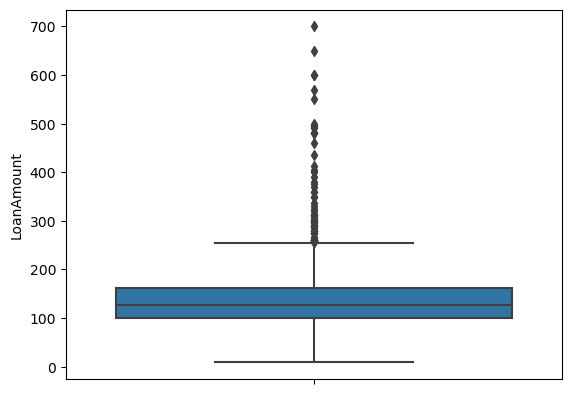

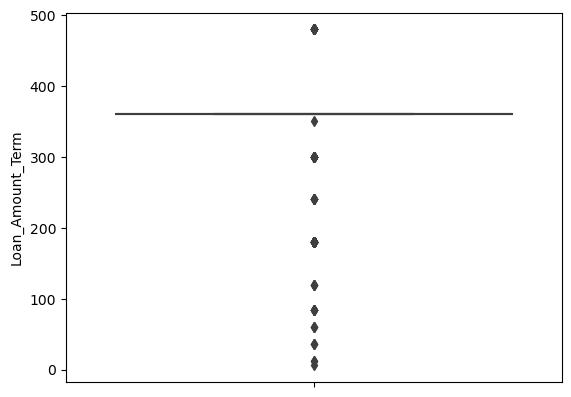

In [11]:
lst_missing_intcols = ['LoanAmount','Loan_Amount_Term']

for i in lst_missing_intcols:
    sns.boxplot(data= dataf, y = i)
    plt.show()

In [30]:
dataf['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

- From the graph above we can see there are outliers in the 'LoanAmount', 'Loan_Amount_Term'column so here we would impute the missing values with median values


In [12]:
for i in lst_missing_intcols:
    dataf[i] = dataf[i].fillna(dataf[i].median())

- Checking if all null values have been imputed and there are no missing values, we will not impute the missing values in the 'Loan_Status' column as it is the dependent variable

In [13]:
dataf.isnull().sum() / len(dataf) * 100

Gender                0.000000
Married               0.000000
Dependents            0.000000
Education             0.000000
Self_Employed         0.000000
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            0.000000
Loan_Amount_Term      0.000000
Credit_History        0.000000
Property_Area         0.000000
Loan_Status          37.410805
data                  0.000000
dtype: float64

# Encoding the columns

- 'Gender','Married','Education','Self_Employed' columns have two distinct values so we would use Label encoding on them.
- We would also convert the 'Loan_Status' column into binary format using Label encoding

In [14]:
lst_label_code = ['Gender','Married','Education','Self_Employed','Loan_Status']

def label_encode(col):
    dataf[col] = dataf[col].astype('category')
    dataf[col] = dataf[col].cat.codes

for col in lst_label_code:
    label_encode(col)

In [30]:
dataf.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
0,1,0,0,0,0,5849,0.0,126.0,360.0,1.0,Urban,1,train
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,train
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,train
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,train
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,train


- Since the columns 'Dependents' and 'Property' area have more than 2 distinct values in it we would use One Hot Encoding on them

In [15]:
dataf = pd.get_dummies(data = dataf, columns= ['Dependents','Property_Area'])

In [51]:
dataf.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,data,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,126.0,360.0,1.0,1,train,1,0,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,train,0,1,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,train,1,0,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,train,1,0,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,train,1,0,0,0,0,0,1


In [16]:
# dropping the 'Dependents_0' and 'Property_Area_Rural' columns as in One Hot encoding we consider n-1 columns where n is no of columns created

dataf = dataf.drop(columns = ['Property_Area_Rural','Dependents_0'], axis = 1)

In [23]:
dataf.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,data,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,126.0,360.0,1.0,1,train,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,train,1,0,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,train,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,train,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,train,0,0,0,0,1


In [17]:
# Separating the train and test  data that we merged

train = dataf[dataf['data'] == 'train']
test = dataf[dataf['data'] == 'test']

In [18]:
# dropping the data column as it is not needed now
train = train.drop(columns = ['data'], axis = 1)
test = test.drop(columns = ['data'], axis = 1)

In [19]:
print(train.shape, test.shape)

(614, 15) (367, 15)


# Checking the data imbalance

In [20]:

train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

- From the above count in the Loan status column we can see the data is imbalanced so we balance it using oversampling. We will first split the data and then balance it

In [21]:
# Splitting the data into dependent and independent variable

x = train.drop(columns = ['Loan_Status'], axis = 1)
y = train[['Loan_Status']]

In [38]:
x.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,126.0,360.0,1.0,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,0,0,0,0,1


In [39]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [22]:
# Oversampling data
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_sam, y_sam  = ros.fit_resample(x,y)
print(x_sam.shape, y_sam.shape)

(844, 14) (844, 1)


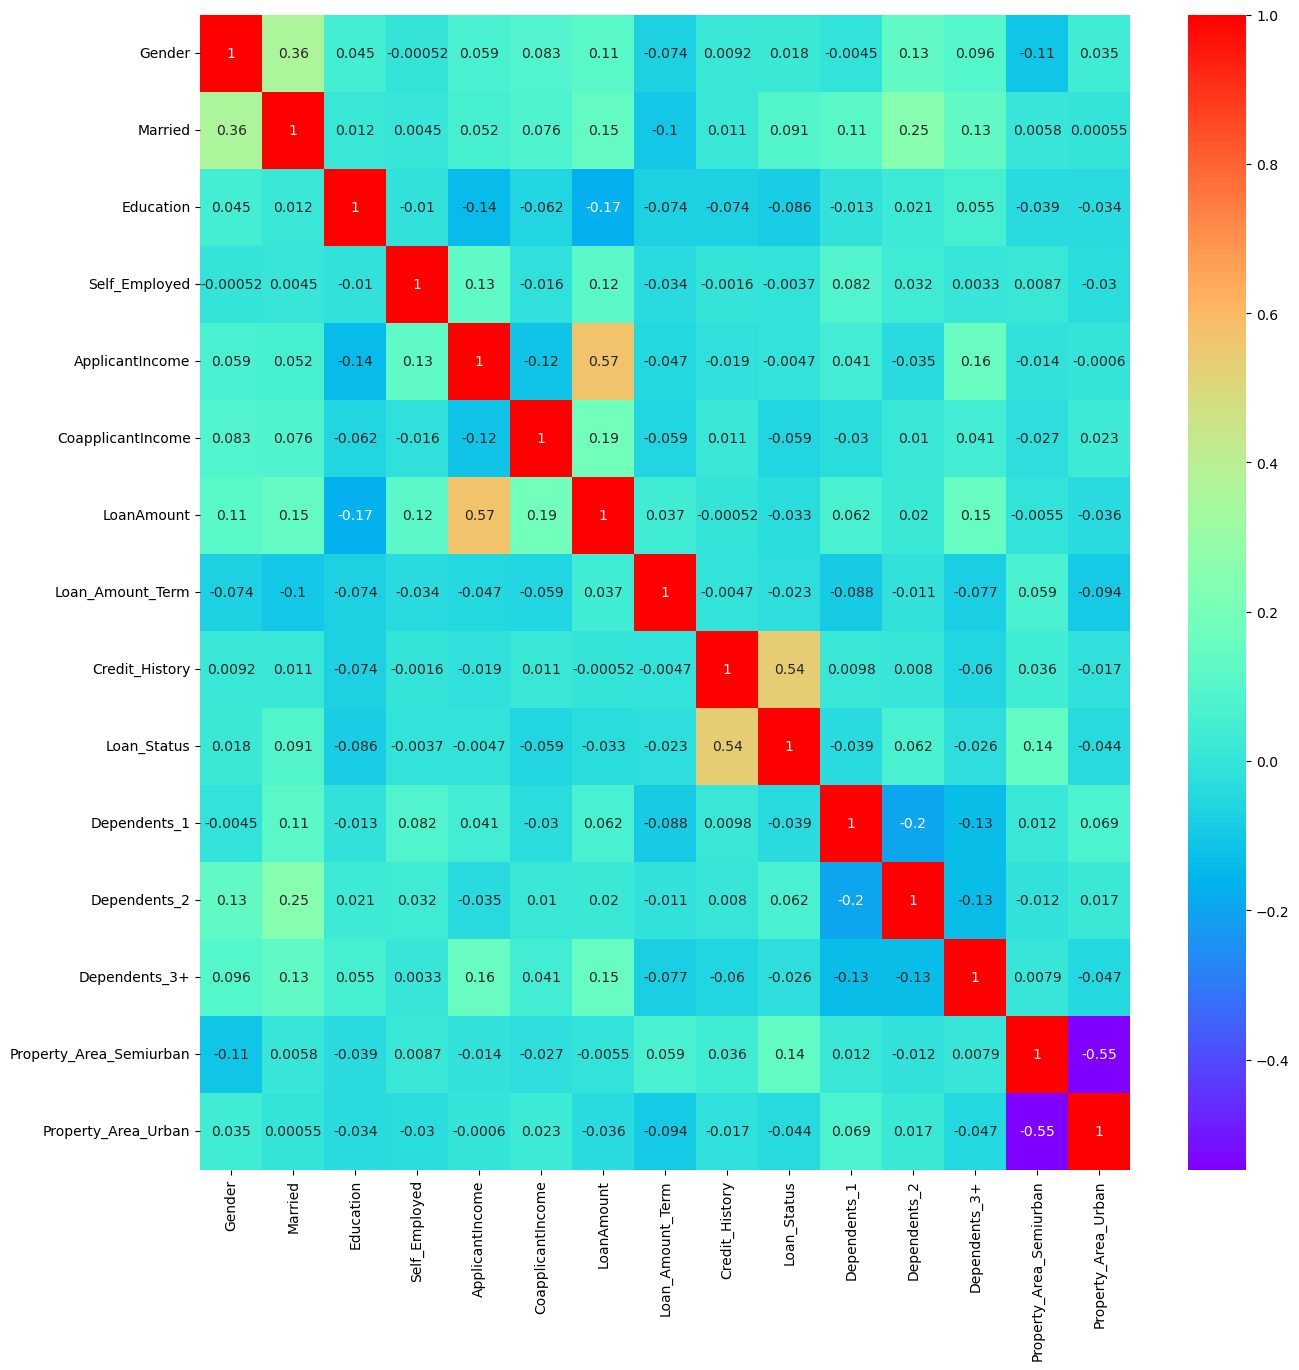

In [26]:
# Checking correlation between the data

corr = train.corr()

plt.figure(figsize = (15,15), dpi = 100)
sns.heatmap(corr, annot = True, cmap = 'rainbow')
plt.show()

- From the heatmap we can see that there is no colinearity in the data

# Feature scaling the data 

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_x = sc.fit_transform(x_sam)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.491097,-1.312471,-0.555452,-0.395176,0.090332,-0.466265,-0.245997,0.269625,0.538999,-0.466790,-0.414997,-0.28886,-0.72161,1.400501
1,0.491097,0.761921,-0.555452,-0.395176,-0.131567,-0.063443,-0.221654,0.269625,0.538999,2.142289,-0.414997,-0.28886,-0.72161,-0.714030
2,0.491097,0.761921,-0.555452,2.530516,-0.409028,-0.466265,-0.976289,0.269625,0.538999,-0.466790,-0.414997,-0.28886,-0.72161,1.400501
3,0.491097,0.761921,1.800335,-0.395176,-0.482118,0.163612,-0.319027,0.269625,0.538999,-0.466790,-0.414997,-0.28886,-0.72161,1.400501
4,0.491097,-1.312471,-0.555452,-0.395176,0.116799,-0.466265,-0.063425,0.269625,0.538999,-0.466790,-0.414997,-0.28886,-0.72161,1.400501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,-2.036257,-1.312471,-0.555452,-0.395176,0.817901,-0.466265,0.825097,0.269625,0.538999,-0.466790,-0.414997,-0.28886,1.38579,-0.714030
840,0.491097,-1.312471,-0.555452,2.530516,0.890815,-0.466265,0.496466,0.269625,-1.855291,-0.466790,-0.414997,-0.28886,-0.72161,1.400501
841,0.491097,0.761921,-0.555452,-0.395176,-0.418317,-0.038066,-0.245997,0.269625,0.538999,-0.466790,2.409658,-0.28886,-0.72161,1.400501
842,0.491097,0.761921,-0.555452,-0.395176,-0.365209,-0.466265,0.289550,0.269625,0.538999,-0.466790,-0.414997,-0.28886,-0.72161,-0.714030


# Splitting data into train and test 

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sc_x, y_sam, test_size = 0.25, random_state = 101,stratify= y_sam)

In [25]:
print(x_train.shape,y_train.shape)

(633, 14) (633, 1)


In [26]:
print(x_test.shape,y_test.shape)

(211, 14) (211, 1)


# Building Logistic Regression model

In [35]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

# Prediction

In [37]:
y_pred_train_lg = logit.predict(x_train)

y_pred_test_lg = logit.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
print("Training accuracy = ", accuracy_score(y_train,y_pred_train_lg ))
print("********" * 5)
print("Test accuracy = ", accuracy_score(y_test,y_pred_test_lg))

Training accuracy =  0.7140600315955766
****************************************
Test accuracy =  0.6682464454976303


In [42]:
print("Training confusion matrix")
print(confusion_matrix(y_train,y_pred_train_lg ))
print("********" * 5)
print("Training confusion matrix")
print(confusion_matrix(y_test,y_pred_test_lg))

Training confusion matrix
[[191 126]
 [ 55 261]]
****************************************
Training confusion matrix
[[62 43]
 [27 79]]


In [43]:
print("Training classification report")
print(classification_report(y_train,y_pred_train_lg ))
print("********" * 5)
print("Training classification report")
print(classification_report(y_test,y_pred_test_lg))

Training classification report
              precision    recall  f1-score   support

           0       0.78      0.60      0.68       317
           1       0.67      0.83      0.74       316

    accuracy                           0.71       633
   macro avg       0.73      0.71      0.71       633
weighted avg       0.73      0.71      0.71       633

****************************************
Training classification report
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       105
           1       0.65      0.75      0.69       106

    accuracy                           0.67       211
   macro avg       0.67      0.67      0.67       211
weighted avg       0.67      0.67      0.67       211



# SVM algorithm

In [55]:
from sklearn.svm import SVC

In [56]:
svm_linear = SVC(kernel ="linear")
svm_linear.fit(x_train,y_train)

y_pred_train_svm_lin = svm_linear.predict(x_train)
y_pred_test_svm_lin = svm_linear.predict(x_test)

print("Training accuracy = ", accuracy_score(y_train,y_pred_train_svm_lin ))
print("********" * 5)
print("Test accuracy = ", accuracy_score(y_test,y_pred_test_svm_lin))
print()
print("=========="*5)
print()
print("Training confusion matrix")
print(confusion_matrix(y_train,y_pred_train_svm_lin ))
print("********" * 5)
print("Test confusion matrix")
print(confusion_matrix(y_test,y_pred_test_svm_lin))
print()
print("=========="*5)
print()
print("Training classification report")
print(classification_report(y_train,y_pred_train_svm_lin ))
print("********" * 5)
print("Training classification report")
print(classification_report(y_test,y_pred_test_svm_lin))

Training accuracy =  0.6966824644549763
****************************************
Test accuracy =  0.6492890995260664


Training confusion matrix
[[202 115]
 [ 77 239]]
****************************************
Test confusion matrix
[[69 36]
 [38 68]]


Training classification report
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       317
           1       0.68      0.76      0.71       316

    accuracy                           0.70       633
   macro avg       0.70      0.70      0.70       633
weighted avg       0.70      0.70      0.70       633

****************************************
Training classification report
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       105
           1       0.65      0.64      0.65       106

    accuracy                           0.65       211
   macro avg       0.65      0.65      0.65       211
weighted avg       0.65      0.65      0.65   

In [58]:
svm_poly = SVC(kernel ="poly")
svm_poly.fit(x_train,y_train)

y_pred_train_svm_poly = svm_poly.predict(x_train)
y_pred_test_svm_poly = svm_poly.predict(x_test)

print("Training accuracy = ", accuracy_score(y_train,y_pred_train_svm_poly ))
print("********" * 5)
print("Test accuracy = ", accuracy_score(y_test,y_pred_test_svm_poly))
print()
print("=========="*5)
print()
print("Training confusion matrix")
print(confusion_matrix(y_train,y_pred_train_svm_poly ))
print("********" * 5)
print("Test confusion matrix")
print(confusion_matrix(y_test,y_pred_test_svm_poly))
print("=========="*5)
print()
print("Training classification report")
print(classification_report(y_train,y_pred_train_svm_poly ))
print("********" * 5)
print("Training classification report")
print(classification_report(y_test,y_pred_test_svm_poly))

Training accuracy =  0.8167456556082149
****************************************
Test accuracy =  0.7345971563981043


Training confusion matrix
[[219  98]
 [ 18 298]]
****************************************
Test confusion matrix
[[63 42]
 [14 92]]

Training classification report
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       317
           1       0.75      0.94      0.84       316

    accuracy                           0.82       633
   macro avg       0.84      0.82      0.81       633
weighted avg       0.84      0.82      0.81       633

****************************************
Training classification report
              precision    recall  f1-score   support

           0       0.82      0.60      0.69       105
           1       0.69      0.87      0.77       106

    accuracy                           0.73       211
   macro avg       0.75      0.73      0.73       211
weighted avg       0.75      0.73      0.73    

In [59]:
svm_sig = SVC(kernel ="sigmoid")
svm_sig.fit(x_train,y_train)

y_pred_train_svm_sig = svm_sig.predict(x_train)
y_pred_test_svm_sig = svm_sig.predict(x_test)

print("Training accuracy = ", accuracy_score(y_train,y_pred_train_svm_sig ))
print("********" * 5)
print("Test accuracy = ", accuracy_score(y_test,y_pred_test_svm_sig))
print()
print("=========="*5)
print()
print("Training confusion matrix")
print(confusion_matrix(y_train,y_pred_train_svm_sig ))
print("********" * 5)
print("Test confusion matrix")
print(confusion_matrix(y_test,y_pred_test_svm_sig))
print("=========="*5)
print()
print("Training classification report")
print(classification_report(y_train,y_pred_train_svm_sig ))
print("********" * 5)
print("Training classification report")
print(classification_report(y_test,y_pred_test_svm_poly))


Training accuracy =  0.6224328593996841
****************************************
Test accuracy =  0.6540284360189573


Training confusion matrix
[[169 148]
 [ 91 225]]
****************************************
Test confusion matrix
[[61 44]
 [29 77]]

Training classification report
              precision    recall  f1-score   support

           0       0.65      0.53      0.59       317
           1       0.60      0.71      0.65       316

    accuracy                           0.62       633
   macro avg       0.63      0.62      0.62       633
weighted avg       0.63      0.62      0.62       633

****************************************
Training classification report
              precision    recall  f1-score   support

           0       0.82      0.60      0.69       105
           1       0.69      0.87      0.77       106

    accuracy                           0.73       211
   macro avg       0.75      0.73      0.73       211
weighted avg       0.75      0.73      0.73    

In [60]:
svm_rbf= SVC(kernel ="rbf")
svm_rbf.fit(x_train,y_train)

y_pred_train_svm_rbf = svm_rbf.predict(x_train)
y_pred_test_svm_rbf = svm_rbf.predict(x_test)

print("Training accuracy = ", accuracy_score(y_train,y_pred_train_svm_rbf ))
print("********" * 5)
print("Test accuracy = ", accuracy_score(y_test,y_pred_test_svm_rbf))
print()
print("=========="*5)
print()
print("Training confusion matrix")
print(confusion_matrix(y_train,y_pred_train_svm_rbf ))
print("********" * 5)
print("Test confusion matrix")
print(confusion_matrix(y_test,y_pred_test_svm_rbf))
print("=========="*5)
print()
print("Training classification report")
print(classification_report(y_train,y_pred_train_svm_rbf ))
print("********" * 5)
print("Training classification report")
print(classification_report(y_test,y_pred_test_svm_rbf))


Training accuracy =  0.8167456556082149
****************************************
Test accuracy =  0.7156398104265402


Training confusion matrix
[[232  85]
 [ 31 285]]
****************************************
Test confusion matrix
[[67 38]
 [22 84]]

Training classification report
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       317
           1       0.77      0.90      0.83       316

    accuracy                           0.82       633
   macro avg       0.83      0.82      0.82       633
weighted avg       0.83      0.82      0.82       633

****************************************
Training classification report
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       105
           1       0.69      0.79      0.74       106

    accuracy                           0.72       211
   macro avg       0.72      0.72      0.71       211
weighted avg       0.72      0.72      0.71    

# Decision tree with gini criterion

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion= 'gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred_train_dt_gini = dt.predict(x_train)
y_pred_test_dt_gini = dt.predict(x_test)

In [46]:
print("Training accuracy = ", accuracy_score(y_train,y_pred_train_dt_gini ))
print("********" * 5)
print("Test accuracy = ", accuracy_score(y_test,y_pred_test_dt_gini))

Training accuracy =  1.0
****************************************
Test accuracy =  0.8341232227488151


In [51]:
print("Training confusion matrix")
print(confusion_matrix(y_train,y_pred_train_dt_gini ))
print("********" * 5)
print("Training confusion matrix")
print(confusion_matrix(y_test,y_pred_test_dt_gini))

Training confusion matrix
[[317   0]
 [  0 316]]
****************************************
Training confusion matrix
[[99  6]
 [29 77]]


In [52]:
print("Training classification report")
print(classification_report(y_train,y_pred_train_dt_gini ))
print("********" * 5)
print("Training classification report")
print(classification_report(y_test,y_pred_test_dt_gini))

Training classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       316

    accuracy                           1.00       633
   macro avg       1.00      1.00      1.00       633
weighted avg       1.00      1.00      1.00       633

****************************************
Training classification report
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       105
           1       0.93      0.73      0.81       106

    accuracy                           0.83       211
   macro avg       0.85      0.83      0.83       211
weighted avg       0.85      0.83      0.83       211



In [32]:
from sklearn.model_selection import cross_val_score
cv_train = cross_val_score(dt,x_train,y_train,cv = 10)
cv_test = cross_val_score(dt,x_test,y_test,cv = 10)

print("Training cross validation score")
print(cv_train.mean())
print("*************************" * 5)
print("Test cross validation score")
print(cv_test.mean())

Training cross validation score
0.8167906746031747
*****************************************************************************************************************************
Test cross validation score
0.6586580086580087


# Decision tree with entropy criterion

In [33]:
dt_ent = DecisionTreeClassifier(criterion = 'entropy')
dt_ent.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
y_pred_train_dtent = dt_ent.predict(x_train)
y_pred_test_dtent = dt_ent.predict(x_test)

In [64]:
print("Training accuracy = ", accuracy_score(y_train,y_pred_train_dtent ))
print("********" * 5)
print("Test accuracy = ", accuracy_score(y_test,y_pred_test_dtent))

Training accuracy =  1.0
****************************************
Test accuracy =  0.8530805687203792


In [65]:
print("Training confusion matrix")
print(confusion_matrix(y_train,y_pred_train_dtent ))
print("********" * 5)
print("Training confusion matrix")
print(confusion_matrix(y_test,y_pred_test_dtent))

Training confusion matrix
[[317   0]
 [  0 316]]
****************************************
Training confusion matrix
[[98  7]
 [24 82]]


In [66]:
print("Training classification report")
print(classification_report(y_train,y_pred_train_dtent ))
print("********" * 5)
print("Training classification report")
print(classification_report(y_test,y_pred_test_dtent))

Training classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       316

    accuracy                           1.00       633
   macro avg       1.00      1.00      1.00       633
weighted avg       1.00      1.00      1.00       633

****************************************
Training classification report
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       105
           1       0.92      0.77      0.84       106

    accuracy                           0.85       211
   macro avg       0.86      0.85      0.85       211
weighted avg       0.86      0.85      0.85       211



In [35]:
# Cross validation 
cv_train_dtent = cross_val_score(dt_ent,x_train,y_train, cv = 10)
cv_test_dtent = cross_val_score(dt_ent,x_test,y_test, cv = 10)
print("Training cross validation score")
print(cv_train_dtent.mean())
print("*************************" * 5)
print("Test cross validation score")
print(cv_test_dtent.mean())

Training cross validation score
0.8279265873015872
*****************************************************************************************************************************
Test cross validation score
0.6493506493506493


# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [40]:
print("Training accuracy = ", accuracy_score(y_train,y_pred_train_rf ))
print("********" * 5)
print("Test accuracy = ", accuracy_score(y_test,y_pred_test_rf))

Training accuracy =  1.0
****************************************
Test accuracy =  0.8815165876777251


In [41]:
print("Train confusion matrix")
print(confusion_matrix(y_train,y_pred_train_rf ))
print("********" * 5)
print("Test confusion matrix")
print(confusion_matrix(y_test,y_pred_test_rf))

Training confusion matrix
[[317   0]
 [  0 316]]
****************************************
Training confusion matrix
[[89 16]
 [ 9 97]]


In [42]:
print("Training classification report")
print(classification_report(y_train,y_pred_train_rf ))
print("********" * 5)
print("Testing classification report")
print(classification_report(y_test,y_pred_test_rf))

Training classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       316

    accuracy                           1.00       633
   macro avg       1.00      1.00      1.00       633
weighted avg       1.00      1.00      1.00       633

****************************************
Training classification report
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       105
           1       0.86      0.92      0.89       106

    accuracy                           0.88       211
   macro avg       0.88      0.88      0.88       211
weighted avg       0.88      0.88      0.88       211



In [45]:
# cross validation
from sklearn.model_selection import cross_val_score

cv_train_rf = cross_val_score(rf, x_train,y_train,cv= 10)
cv_test_rf = cross_val_score(rf, x_test,y_test,cv= 10)
print("Training cross validation score")
print(cv_train_rf.mean())
print("*************************" * 5)
print("Test cross validation score")
print(cv_test_rf.mean())

Training cross validation score
0.8925843253968255
*****************************************************************************************************************************
Test cross validation score
0.7443722943722944


# Building the KNN model

In [52]:
# finding the best k value for building the model
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_i = knn.predict(x_test)
    error_rate.append(np.mean(y_pred_i != np.array(y_test)))

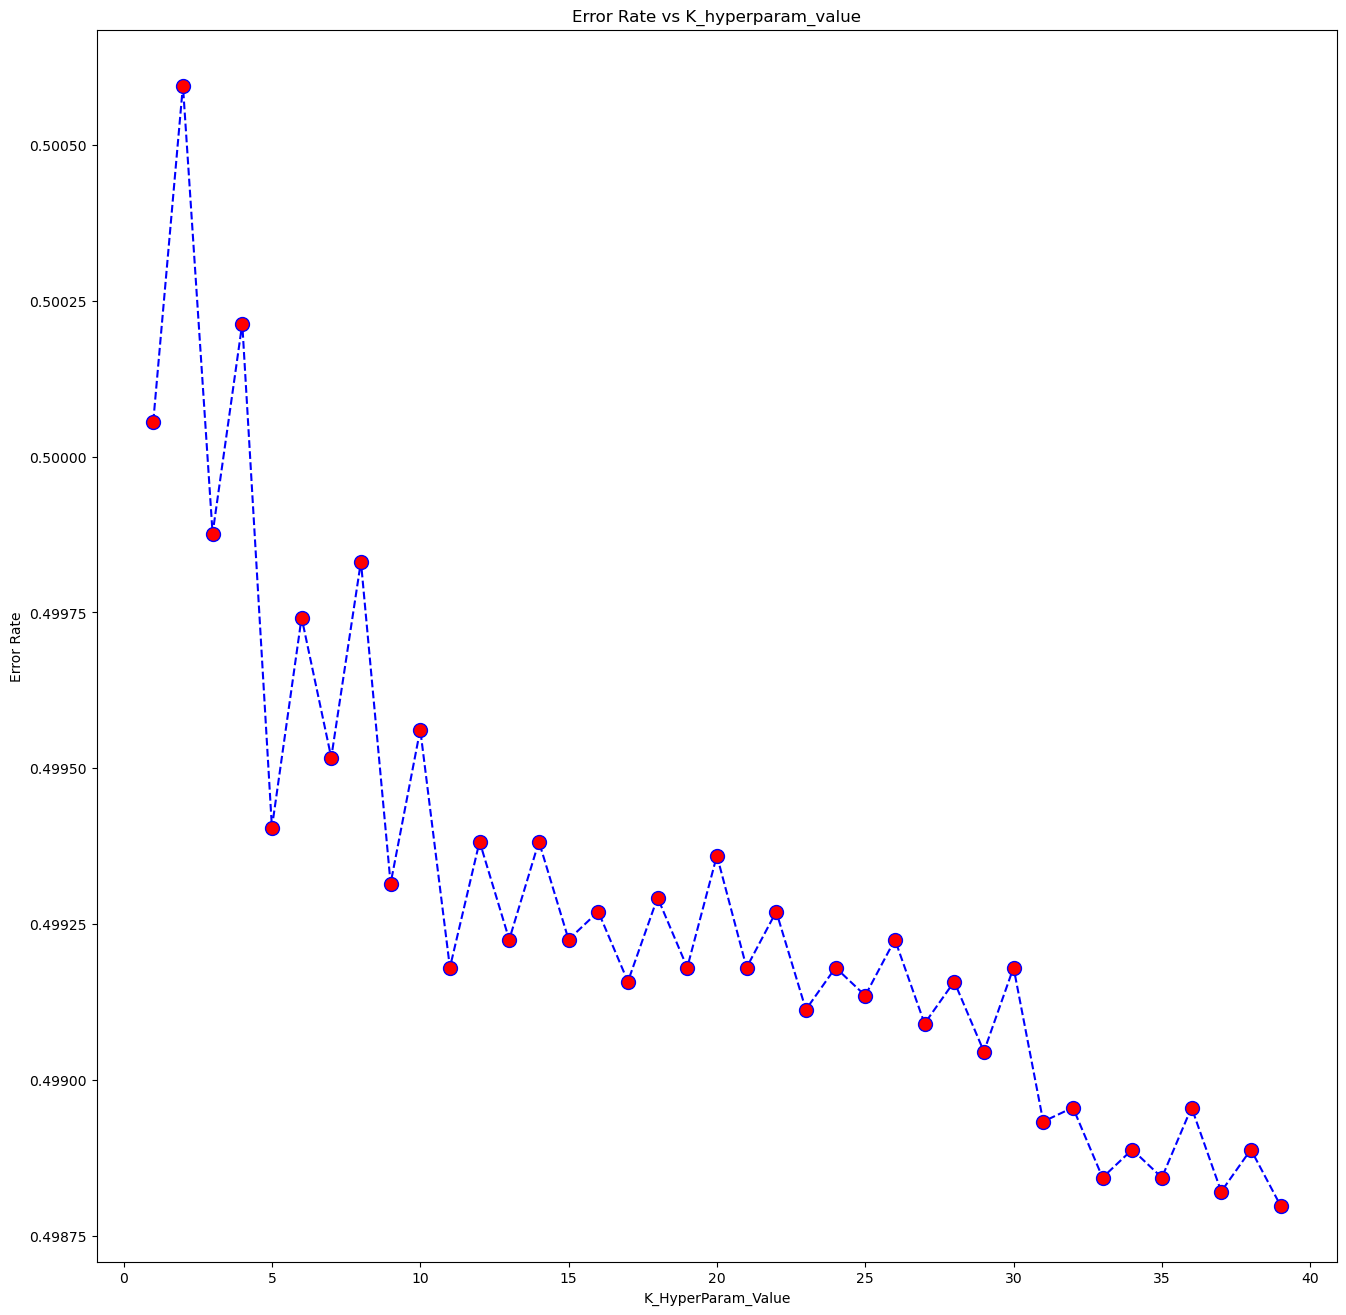

In [53]:
# plotting the above error rates against the K values

plt.figure(figsize = (16,16), dpi = 100)

plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed',marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs K_hyperparam_value")
plt.xlabel("K_HyperParam_Value")
plt.ylabel("Error Rate")
plt.show()

- From the above plot we can see that least error is when k = 39 so we choose k = 39 and build the model

In [68]:
knn_model = KNeighborsClassifier(n_neighbors = 39)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=39)

In [69]:
y_pred_train_knn = knn_model.predict(x_train)
y_pred_test_knn = knn_model.predict(x_test)

- Evaluating the model

In [70]:
print("Training accuracy score for KNN model")
print(accuracy_score(y_train, y_pred_train_knn))
print("****************"*5)
print("Test accuracy score for KNN model")
print(accuracy_score(y_test, y_pred_test_knn))

Training accuracy score for KNN model
0.7298578199052133
********************************************************************************
Test accuracy score for KNN model
0.7203791469194313


In [71]:
print("Confusion matrix for Training for KNN model")
print(confusion_matrix(y_train, y_pred_train_knn))
print("****************"*5)
print("Confusion matrix for Test for KNN model")
print(confusion_matrix(y_test, y_pred_test_knn))

Confusion matrix for Training for KNN model
[[164 153]
 [ 18 298]]
********************************************************************************
Confusion matrix for Test for KNN model
[[ 49  56]
 [  3 103]]


In [72]:
print("Classification report for Training for KNN model")
print(classification_report(y_train, y_pred_train_knn))
print("****************"*5)
print("Classification report for Test for KNN model")
print(classification_report(y_test, y_pred_test_knn))

Classification report for Training for KNN model
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       317
           1       0.66      0.94      0.78       316

    accuracy                           0.73       633
   macro avg       0.78      0.73      0.72       633
weighted avg       0.78      0.73      0.72       633

********************************************************************************
Classification report for Test for KNN model
              precision    recall  f1-score   support

           0       0.94      0.47      0.62       105
           1       0.65      0.97      0.78       106

    accuracy                           0.72       211
   macro avg       0.80      0.72      0.70       211
weighted avg       0.79      0.72      0.70       211



# Building Gradient Boosting model

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gdb = GradientBoostingClassifier()


GradientBoostingClassifier()

In [28]:
y_pred_train_gdb = gdb.predict(x_train)
y_pred_test_gdb = gdb.predict(x_test)

In [31]:
print("Training accuracy score for gradient boosting")
print(accuracy_score(y_train, y_pred_train_gdb))
print("****************"*5)
print("Test accuracy score for gradient boosting")
print(accuracy_score(y_test, y_pred_test_gdb))
print()
print("============"*5)
print()
print("Confusion matrix for Training for gradient boosting model")
print(confusion_matrix(y_train, y_pred_train_gdb))
print("****************"*5)
print("Confusion matrix for Test for gradient boosting model")
print(confusion_matrix(y_test, y_pred_test_gdb))
print()
print("============"*5)
print()
print("Classification report for Training for gradient boosting model")
print(classification_report(y_train, y_pred_train_gdb))
print("****************"*5)
print("Classification report for Test for gradient boosting model")
print(classification_report(y_test, y_pred_test_gdb))

Training accuracy score for gradient boosting
0.9004739336492891
********************************************************************************
Test accuracy score for gradient boosting
0.8104265402843602


Confusion matrix for Training for gradient boosting model
[[261  56]
 [  7 309]]
********************************************************************************
Confusion matrix for Test for gradient boosting model
[[79 26]
 [14 92]]


Classification report for Training for gradient boosting model
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       317
           1       0.85      0.98      0.91       316

    accuracy                           0.90       633
   macro avg       0.91      0.90      0.90       633
weighted avg       0.91      0.90      0.90       633

********************************************************************************
Classification report for Test for gradient boosting model
              precision 

# Building XG Boost model

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [37]:
print("Training accuracy score for gradient boosting")
print(accuracy_score(y_train, y_pred_train_xgb))
print("****************"*5)
print("Test accuracy score for gradient boosting")
print(accuracy_score(y_test, y_pred_test_xgb))
print()
print("============"*5)
print()
print("Confusion matrix for Training for gradient boosting model")
print(confusion_matrix(y_train, y_pred_train_xgb))
print("****************"*5)
print("Confusion matrix for Test for gradient boosting model")
print(confusion_matrix(y_test, y_pred_test_xgb))
print()
print("============"*5)
print()
print("Classification report for Training for gradient boosting model")
print(classification_report(y_train, y_pred_train_xgb))
print("****************"*5)
print("Classification report for Test for gradient boosting model")
print(classification_report(y_test, y_pred_test_xgb))

Training accuracy score for gradient boosting
1.0
********************************************************************************
Test accuracy score for gradient boosting
0.8815165876777251


Confusion matrix for Training for gradient boosting model
[[317   0]
 [  0 316]]
********************************************************************************
Confusion matrix for Test for gradient boosting model
[[93 12]
 [13 93]]


Classification report for Training for gradient boosting model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       316

    accuracy                           1.00       633
   macro avg       1.00      1.00      1.00       633
weighted avg       1.00      1.00      1.00       633

********************************************************************************
Classification report for Test for gradient boosting model
              precision    recall  f1-s

- From the above models we can see that the Gradient boosting model has given us the best results as in the train and test accuracy we have the least difference
- Therefore we would use this model to predict results for the test dataset

In [38]:
test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,5720,0.0,110.0,360.0,1.0,-1,0,0,0,0,1
1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,-1,1,0,0,0,1
2,1,1,0,0,5000,1800.0,208.0,360.0,1.0,-1,0,1,0,0,1
3,1,1,0,0,2340,2546.0,100.0,360.0,1.0,-1,0,1,0,0,1
4,1,0,1,0,3276,0.0,78.0,360.0,1.0,-1,0,0,0,0,1


In [40]:
test.Loan_Status.value_counts()

-1    367
Name: Loan_Status, dtype: int64

- dropping the Load_Status column as it -1 for all data and we would be predicting it using Gradient boosting

In [41]:
testdf = test.drop(columns= ['Loan_Status'],axis = 1)

In [42]:
testdf.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,5720,0.0,110.0,360.0,1.0,0,0,0,0,1
1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,1,0,0,0,1
2,1,1,0,0,5000,1800.0,208.0,360.0,1.0,0,1,0,0,1
3,1,1,0,0,2340,2546.0,100.0,360.0,1.0,0,1,0,0,1
4,1,0,1,0,3276,0.0,78.0,360.0,1.0,0,0,0,0,1


In [43]:
y_pred_test = gdb.predict(testdf)

In [49]:
Loan = pd.DataFrame (data = y_pred_test,columns = ['Loan_Status'])
Loan.head()

,Loan_Status
0,0
1,0
2,0
3,0
4,1


- We have merged the Loan dataframe that contained the predictions for the test data  and create the Final Dataframe below

In [51]:
# we merge the testdf dataframe with the Loan dataframe
Finaldf = pd.concat([testdf,Loan], axis= 1)
Finaldf.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,1,1,0,0,5720,0.0,110.0,360.0,1.0,0,0,0,0,1,0
1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,1,0,0,0,1,0
2,1,1,0,0,5000,1800.0,208.0,360.0,1.0,0,1,0,0,1,0
3,1,1,0,0,2340,2546.0,100.0,360.0,1.0,0,1,0,0,1,0
4,1,0,1,0,3276,0.0,78.0,360.0,1.0,0,0,0,0,1,1
